In [111]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools
# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols
#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (12,10)

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv("./datos/bikes.csv", index_col = 0)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# EDA

In [3]:
df.shape

(730, 16)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [7]:
df.describe(include = "O").T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188


In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.duplicated().sum()

0

LIMPIEZA

CASTEAMOS la variable dteday a DATETIME.

In [11]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [12]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [13]:
# comprobamos que hemos modificado el tipo de la columna a datetime.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

Vamos a corregir los valores de season  y además los casteamos a int. (primavera:1, verano:2, otoño:3, invierno:4)

In [14]:
season_cambio = {"spring":4, "summer":1, "autumn": 2, "winter":3}

In [15]:
df["season"]=df["season"].map(season_cambio)

In [16]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,4,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


Vamos a redondear los float a dos decimales. 

In [17]:
df = df.round(2)

In [18]:
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,6,2018-06-01,4,0,1,0,4,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,7,2018-07-01,4,0,1,0,5,1,2,8.06,10.44,49.87,11.30,148,1362,1510
7,8,2018-08-01,4,0,1,0,6,0,2,6.76,8.11,53.58,17.88,68,891,959
8,9,2018-09-01,4,0,1,0,0,0,1,5.67,5.81,43.42,24.25,54,768,822
9,10,2018-10-01,4,0,1,0,1,1,1,6.18,7.54,48.29,14.96,41,1280,1321


Vamos a corregir los valores de weekday (lunes:1, domingo 7)

In [19]:
semana_cambio = {6:1, 0:2, 1:3, 2:4, 3:5, 4:6, 5:7}

In [20]:
df["weekday"]=df["weekday"].map(semana_cambio)

In [21]:
df.to_csv("./datos/limpieza.csv")

In [22]:
# A partir del csv limpieza, generamos manualmente y fuera del código el csv "limpieza_holidays_bien" introduciendo a mano los días festivos

In [23]:
df2=pd.read_csv('./datos/limpieza_holidays_bien.csv', sep=',', index_col=0)
df2.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [24]:
df2['workingday']= np.where(df2['weekday']>5,0,1)

In [25]:
df2['workingday']=np.where(df2['holiday']==1,0,df2.workingday)

In [26]:
df2

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,4,1,12,0,6,0,2,10.42,11.33,65.29,23.46,247,1867,2114
726,727,2019-12-28,4,1,12,0,7,0,2,10.39,12.75,59.00,10.42,644,2451,3095
727,728,2019-12-29,4,1,12,0,1,1,2,10.39,12.12,75.29,8.33,159,1182,1341
728,729,2019-12-30,4,1,12,0,2,1,1,10.49,11.58,48.33,23.50,364,1432,1796


# Análisis visual exploratorio

In [27]:
# Dejamos preparados dataframes para numericas y categóricas

In [28]:
numericas = df2.select_dtypes(include= np.number).drop(["instant","season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"], axis=1)
numericas.head(1)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.11,18.18,80.58,10.75,331,654,985


In [29]:
categoricas = df[['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']]
categoricas.head(1)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit
0,2018-01-01,4,0,1,0,1,0,2


Histogramas de distribución de variables numéricas

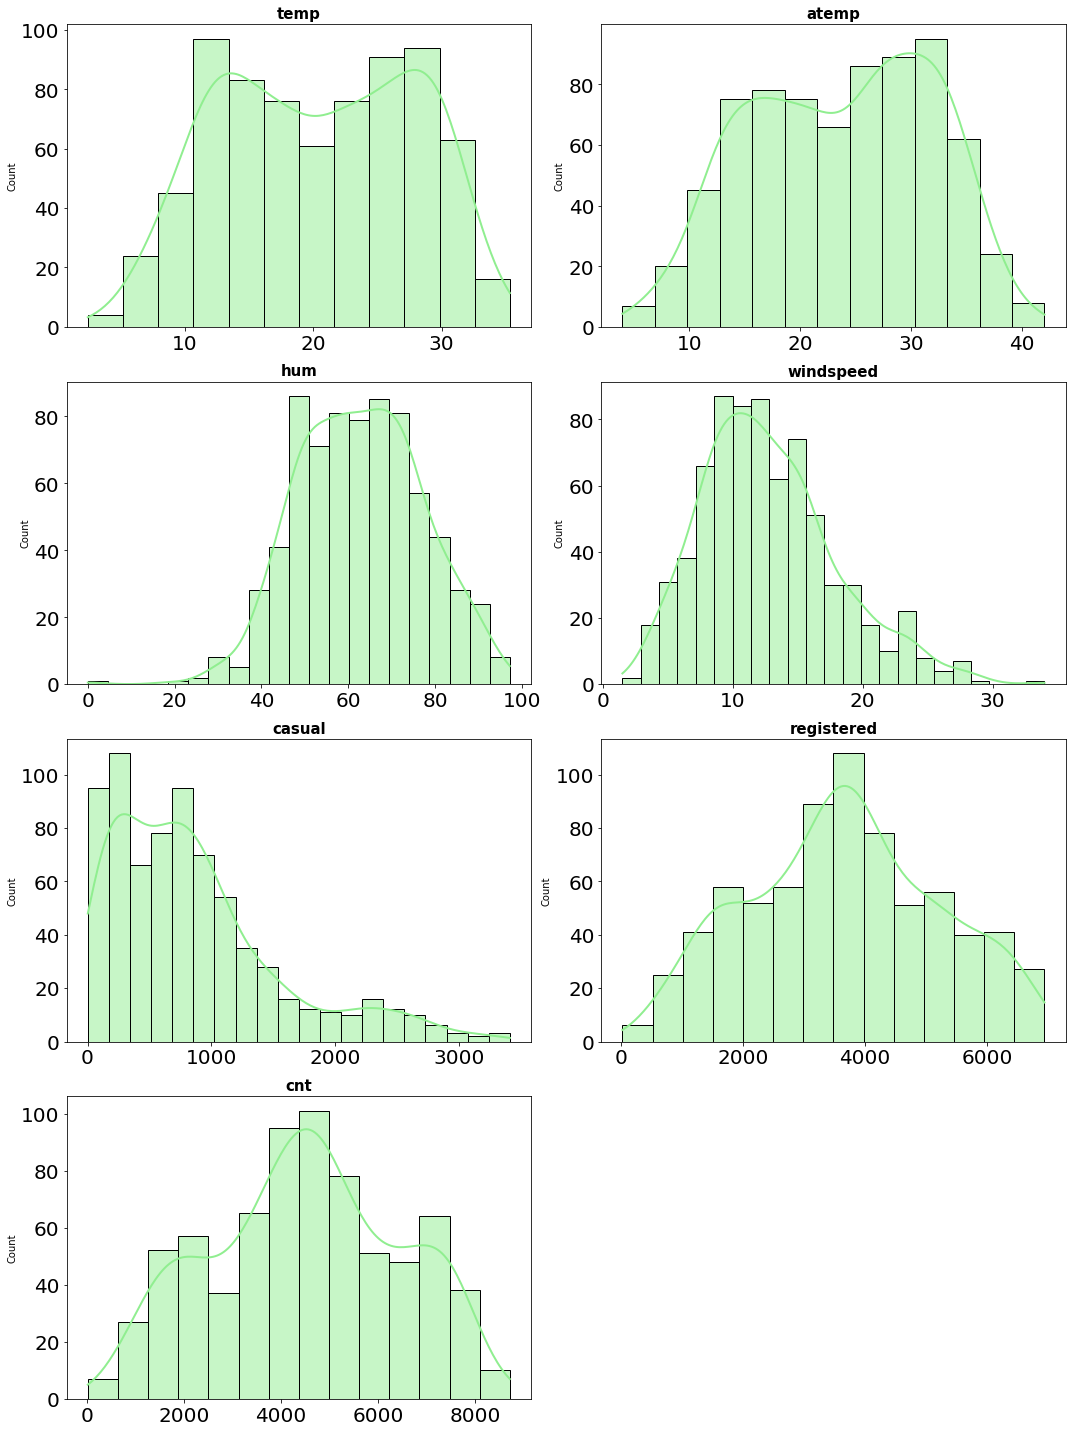

In [30]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15,20))

axes = axes.flat

for i, colum in enumerate(numericas): 
    sns.histplot(
    data = df2,
    x = colum,
    kde = True, 
    color = "lightgreen", 
    line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
    alpha = 0.5, # para especificar la transparencia del color
    ax = axes[i])


    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")


fig.delaxes(axes[-1])
fig.tight_layout()

Boxplots de las variables numéricas

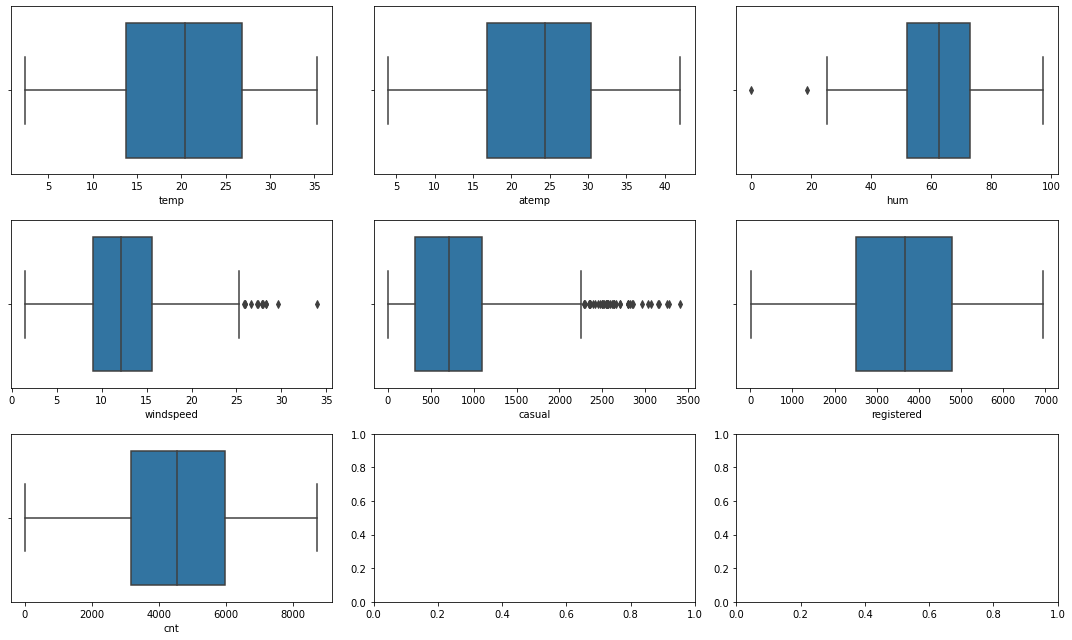

In [31]:
fig, axes = plt.subplots (nrows=3, ncols=3, figsize = (15,9))
axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x= columna, data = df, ax = axes[indice])
    
plt.tight_layout()
plt.show()

In [32]:
## Pensar que vamos a hacer con los outliers

Observación de la asunción de normalidad gráficamente en posibles variables respuesta (cnt, registered, casual)

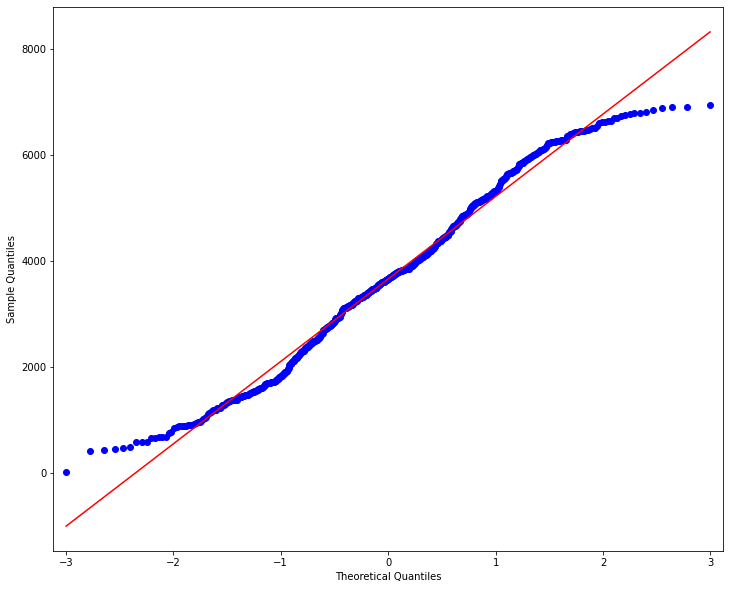

In [33]:
sm.qqplot(df['registered'], line= 's');

In [34]:
stats.shapiro(df["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

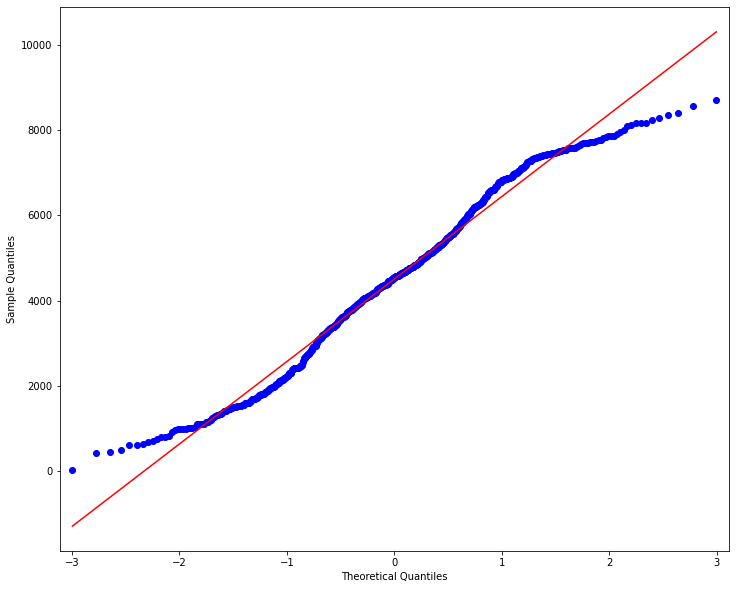

In [35]:
sm.qqplot(df['cnt'], line= 's');

In [36]:
stats.shapiro(df["cnt"])

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

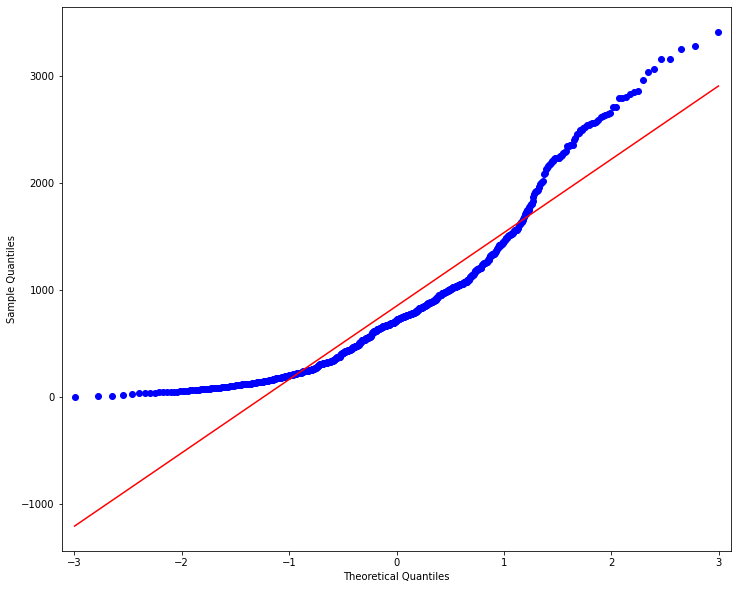

In [37]:
sm.qqplot(df['casual'], line= 's');

In [38]:
stats.shapiro(df["casual"])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

Correlación y heatmaps

<AxesSubplot:>

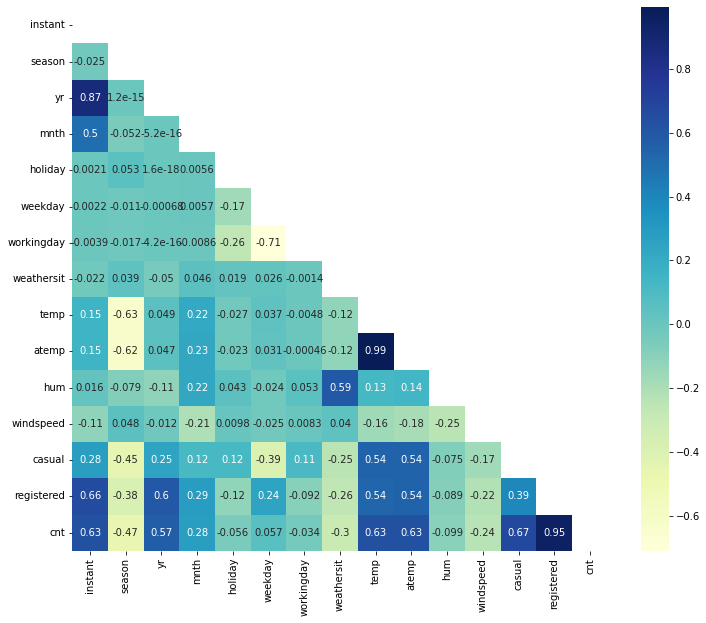

In [39]:
mask = np.triu(np.ones_like(df2.corr(), dtype = np.bool))
sns.heatmap(df2.corr(), cmap = "YlGnBu",mask=mask,annot=True)

In [40]:
# Posibles variables respuesta : cnt, registered, casual, ninguna es normal por lo de ahora
# Posibles variables predictoras

#Predecir por

Estudios de temporalidad

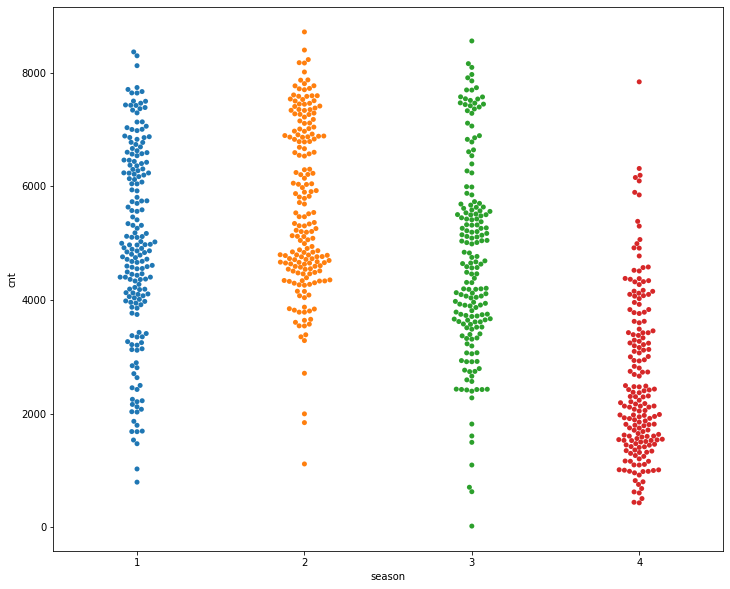

In [41]:
sns.swarmplot(df2['season'],df2['cnt']);

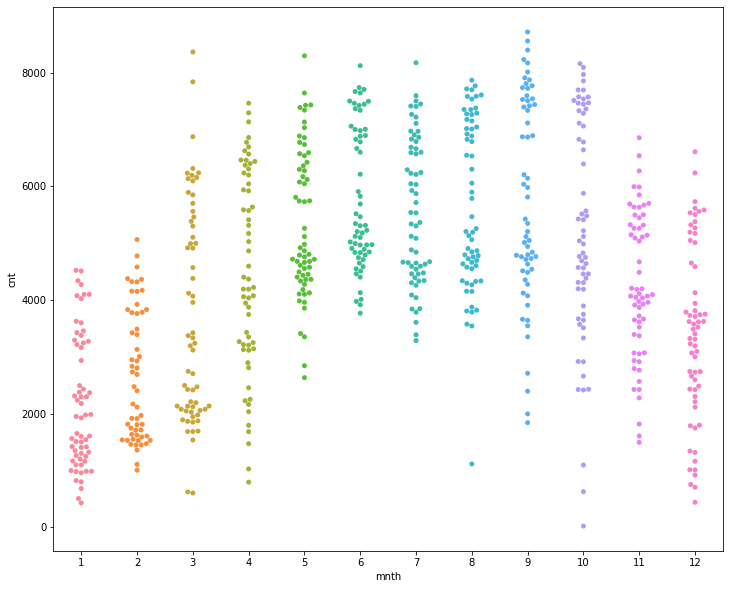

In [42]:
sns.swarmplot(df2['mnth'],df2['cnt']);

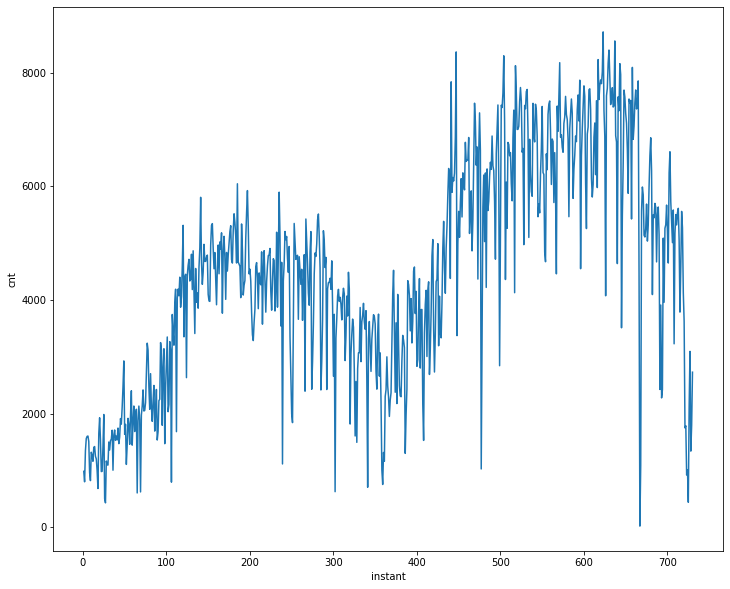

In [43]:
sns.lineplot(data= df2, x="instant", y="cnt");

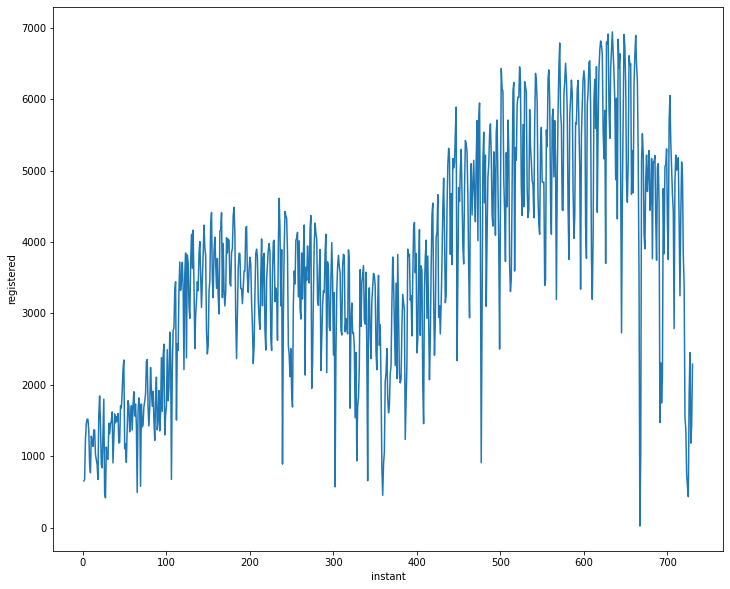

In [44]:
sns.lineplot(data= df2, x="instant", y="registered");

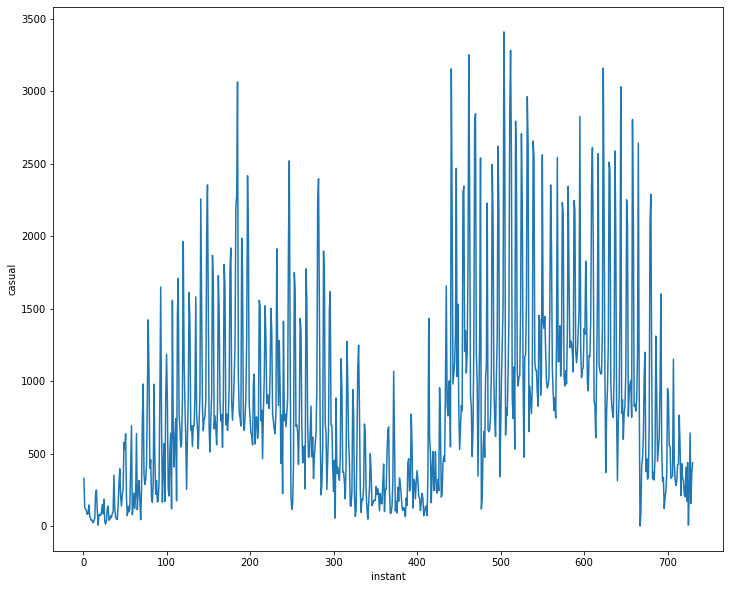

In [45]:
sns.lineplot(data= df2, x="instant", y="casual");

In [46]:
# completar con las gráficas de Diana

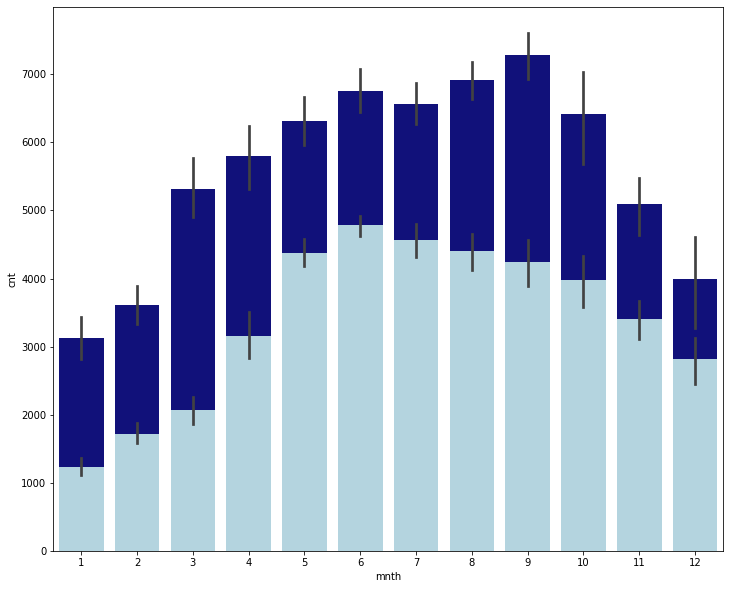

In [47]:

sns.barplot(y="cnt", x="mnth", data=df2[df2['yr']==1],  color='darkblue')
sns.barplot(y="cnt",  x="mnth", data=df2[df2['yr']==0], color='lightblue');

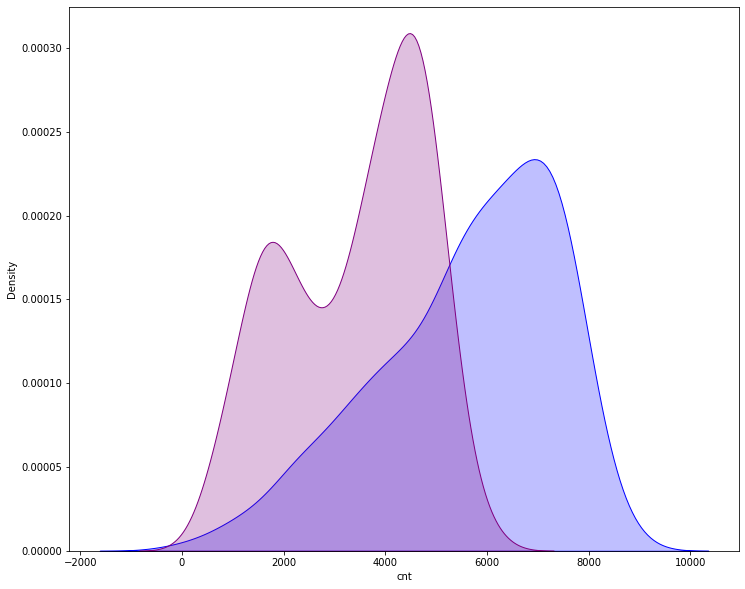

In [48]:
df_19= df2[df2['yr']==1]
df_18= df2[df2['yr']==0]

sns.distplot(
    df_19["cnt"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1})
sns.distplot(
    df_18["cnt"], 
    hist = False, 
    color = "purple", 
    kde_kws = {"shade": True, "linewidth": 1});

Modelo regresión lineal

Modelo 1 para columna "registered"

In [49]:
df_registered = df2.drop(["cnt"], axis=1)
df_registered.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,18.18,80.58,10.75,331,654


In [50]:
numericas_registered = df_registered.select_dtypes(include= np.number).drop(["instant","season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"], axis=1)
numericas_registered.head(1)

,temp,atemp,hum,windspeed,casual,registered
0,14.11,18.18,80.58,10.75,331,654


In [51]:
# Vamos a gestionar los outliers de "casual"

In [52]:
def detectar_outliers(dataframe):
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    # iteramos por la lista de las "casual"umnas numéricas de nuestro dataframe
    #calculamos los cuartiles Q1 y Q3
    Q1 = np.nanpercentile(dataframe["casual"], 25)
    Q3 = np.nanpercentile(dataframe["casual"], 75)
    # calculamos el rango intercuartil
    IQR = Q3 - Q1
    # calculamos los límites
    outlier_step = 1.5 * IQR
    # filtramos nuestro dataframe para indentificar los outliers
    outliers_data = dataframe[(dataframe["casual"] < Q1 - outlier_step) | (dataframe["casual"] > Q3 + outlier_step)]
    display(outliers_data)
    return dicc_indices, outliers_data

In [53]:
numericas_registered.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered'], dtype='object')

In [54]:
ind, df_outliers = detectar_outliers(numericas_registered)

,temp,atemp,hum,windspeed,casual,registered
148,27.37,30.78,81.88,14.33,2355,2433
183,29.38,33.43,68.25,15.33,2282,2367
184,29.79,33.27,63.79,5.46,3065,2978
196,28.15,31.91,58.50,13.96,2418,3505
246,29.08,33.27,74.21,13.83,2521,2419
281,22.17,26.20,72.75,4.25,2397,3114
440,21.08,25.25,75.58,7.42,3155,4681
446,24.67,28.50,69.42,7.79,2469,5893
454,17.39,21.09,73.83,16.79,2301,3934
455,17.46,20.86,67.62,11.54,2347,3694


In [55]:
ind

{}

In [56]:
df_outliers["casual"].min()

2282

In [57]:
df_menores = df2[df2["casual"] < 2282]

In [58]:
df_menores

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,2018-02-01,4,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801
2,3,2018-03-01,4,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,2018-04-01,4,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,2018-05-01,4,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,4,1,12,0,6,0,2,10.42,11.33,65.29,23.46,247,1867,2114
726,727,2019-12-28,4,1,12,0,7,0,2,10.39,12.75,59.00,10.42,644,2451,3095
727,728,2019-12-29,4,1,12,0,1,1,2,10.39,12.12,75.29,8.33,159,1182,1341
728,729,2019-12-30,4,1,12,0,2,1,1,10.49,11.58,48.33,23.50,364,1432,1796


A partir de ahora trabajamos con df_menores 

In [59]:
# Normalizar registered, qué metodo usamos?

In [ ]:
# metodo raiz + boxcox

In [60]:
df_menores['registered_raiz'] = df_menores['registered'].apply(lambda x: math.sqrt(x))

In [61]:
df_menores['registered_box'], lambda_ajustada = stats.boxcox(df_menores['registered_raiz'])


In [62]:
df_menores['registered_box']

0      103.563400
1      105.563331
2      170.508277
3      194.703993
4      201.435772
          ...    
725    237.155262
726    293.919159
727    165.338911
728    192.375437
729    278.590683
Name: registered_box, Length: 686, dtype: float64

In [63]:
lambda_ajustada

1.57312432510937

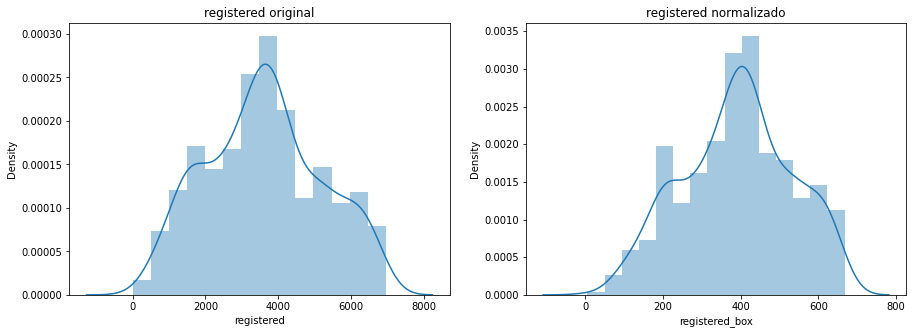

In [105]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('registered original')
axes[1].set_title('registered normalizado')

sns.distplot(df_menores["registered"] ,ax = axes[0])
sns.distplot(df_menores["registered_box"], ax = axes[1]);

In [65]:
stats.shapiro(df_menores["registered_box"])

ShapiroResult(statistic=0.9845245480537415, pvalue=1.1885449566761963e-06)

In [66]:
# vamos a probar el de sklearn 

In [87]:
numericas_b = df_menores.select_dtypes(include = np.number)

In [88]:
minmax = MinMaxScaler()

In [89]:
minmax.fit(df_menores[['registered']])

MinMaxScaler()

In [90]:
# transformamos los datos
X_normalizadas = minmax.transform(df_menores[["registered"]])

In [91]:
# Vamos a verificar los valores mínimos después de la normalización
X_normalizadas.min(axis=0)

array([0.])

In [92]:
# y los máximos?
X_normalizadas.max(axis=0)

array([1.])

In [93]:
numericasb_minmax = pd.DataFrame(X_normalizadas, columns = ["registered_sk"])
numericasb_minmax.head(2)

,registered_sk
0,0.091539
1,0.093849


In [94]:
df_menores["registered_sk"] = numericasb_minmax
df_menores.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_raiz,registered_box,registered_sk,registered_log
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,18.18,80.58,10.75,331,654,985,25.573424,103.563400,0.091539,6.483107
1,2,2018-02-01,4,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801,25.884358,105.563331,0.093849,6.507278


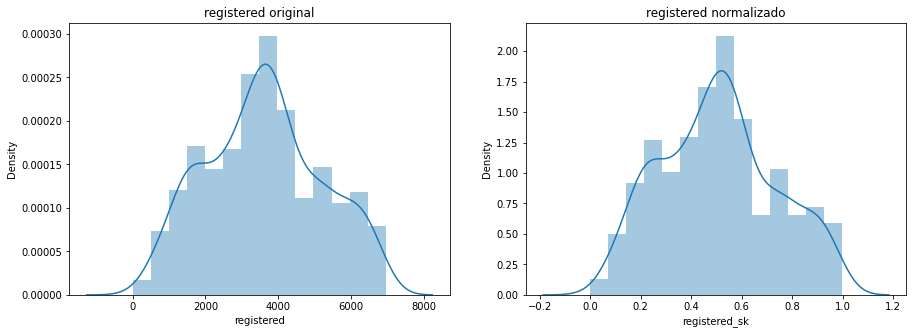

In [106]:
# ahora chequeemos si nuestra variable tiene una distribución normal

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('registered original')
axes[1].set_title('registered normalizado')

sns.distplot(df_menores['registered'] ,ax = axes[0])
sns.distplot(df_menores['registered_sk'], ax = axes[1]);

In [96]:
stats.shapiro(df_menores["registered_sk"])

ShapiroResult(statistic=nan, pvalue=1.0)

In [ ]:
# Probamos con el método de normalizar con logaritmos

In [80]:
df_menores["registered_log"] = df_menores["registered"].apply(lambda x: np.log(x) if x > 0 else 0)

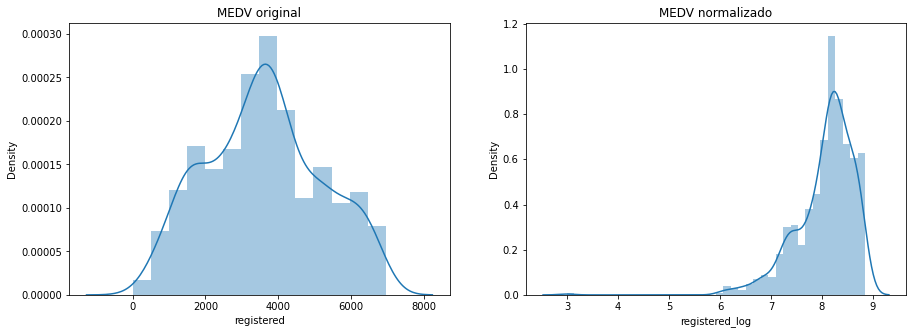

In [82]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('MEDV original')
axes[1].set_title('MEDV normalizado')

sns.distplot(df_menores["registered"] ,ax = axes[0])
sns.distplot(df_menores["registered_log"], ax = axes[1]);

In [83]:
stats.shapiro(df_menores["registered_log"])

ShapiroResult(statistic=0.8806928992271423, pvalue=1.5523745104886966e-22)

In [107]:
# No hemos conseguido normalizar la columna registered con ninguno de los métodos, 
# probamos ahora a aplicar la normalizadción a cnt por si cambia algo, pero no

In [99]:
df_menores['cnt_raiz'] = df_menores['cnt'].apply(lambda x: math.sqrt(x))

In [100]:
df_menores['cnt_box'], lambda_ajustada = stats.boxcox(df_menores['cnt_raiz'])


In [101]:
df_menores['cnt_box']

0      239.297756
1      199.535247
2      315.425654
3      358.754913
4      366.405538
          ...    
725    467.899109
726    653.751416
727    313.782521
728    405.523144
729    585.411583
Name: cnt_box, Length: 686, dtype: float64

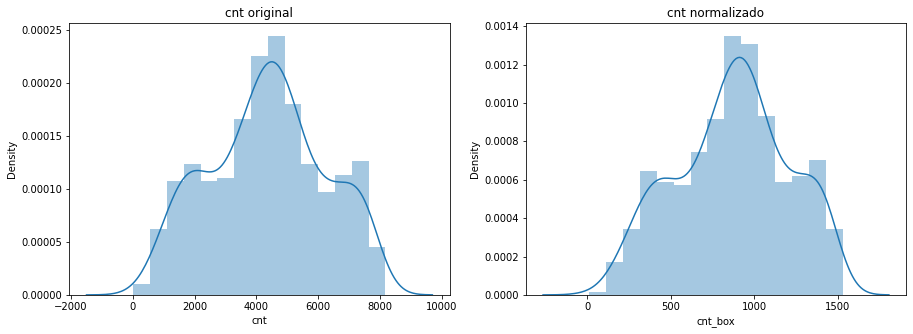

In [104]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('cnt original')
axes[1].set_title('cnt normalizado')

sns.distplot(df_menores["cnt"] ,ax = axes[0])
sns.distplot(df_menores["cnt_box"], ax = axes[1]);

In [103]:
stats.shapiro(df_menores["cnt_box"])

ShapiroResult(statistic=0.9804165363311768, pvalue=6.039999078666369e-08)

Nuestra variable respuesta "registered" no es normal, pero el mejor valor lo tenemos unsando "registered_box"

Asunción de independencia de variables

In [ ]:
# gráficamente con la matriz de correlación/heatmap y analícitamente con chi-square

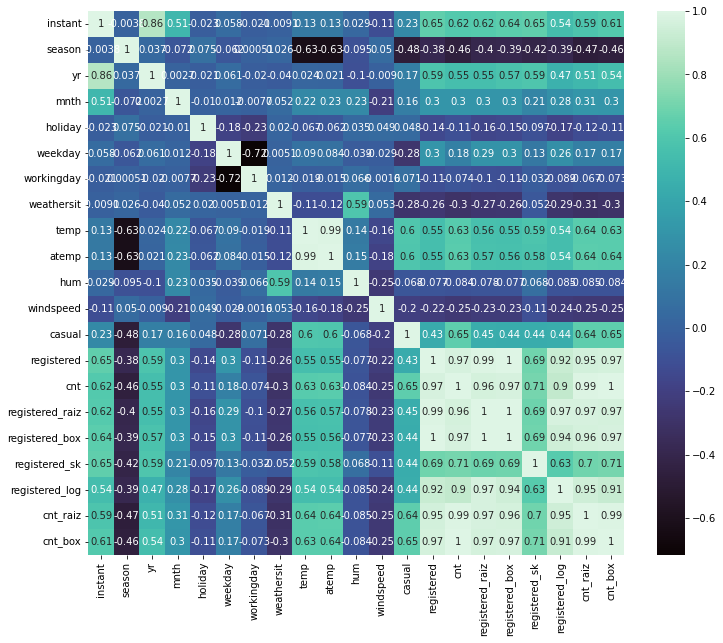

In [112]:
sns.heatmap(df_menores.corr(), annot = True, cmap = "mako");

In [115]:
df_menores.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'registered_raiz', 'registered_box',
       'registered_sk', 'registered_log', 'cnt_raiz', 'cnt_box'],
      dtype='object')

In [109]:
df_menores.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,registered_raiz,registered_box,registered_sk,registered_log,cnt_raiz,cnt_box
0,1,2018-01-01,4,0,1,1,1,0,2,14.11,...,10.75,331,654,985,25.573424,103.5634,0.091539,6.483107,31.38471,239.297756


In [119]:
from itertools import combinations
predictores = df_menores.columns.drop(["cnt","instant","dteday" , "registered_sk", "registered_log", "registered_raiz", "cnt_raiz", "cnt_box", "temp"])

In [120]:
combinaciones = list(combinations(predictores,2))
combinaciones

[('season', 'yr'),
 ('season', 'mnth'),
 ('season', 'holiday'),
 ('season', 'weekday'),
 ('season', 'workingday'),
 ('season', 'weathersit'),
 ('season', 'atemp'),
 ('season', 'hum'),
 ('season', 'windspeed'),
 ('season', 'casual'),
 ('season', 'registered'),
 ('season', 'registered_box'),
 ('yr', 'mnth'),
 ('yr', 'holiday'),
 ('yr', 'weekday'),
 ('yr', 'workingday'),
 ('yr', 'weathersit'),
 ('yr', 'atemp'),
 ('yr', 'hum'),
 ('yr', 'windspeed'),
 ('yr', 'casual'),
 ('yr', 'registered'),
 ('yr', 'registered_box'),
 ('mnth', 'holiday'),
 ('mnth', 'weekday'),
 ('mnth', 'workingday'),
 ('mnth', 'weathersit'),
 ('mnth', 'atemp'),
 ('mnth', 'hum'),
 ('mnth', 'windspeed'),
 ('mnth', 'casual'),
 ('mnth', 'registered'),
 ('mnth', 'registered_box'),
 ('holiday', 'weekday'),
 ('holiday', 'workingday'),
 ('holiday', 'weathersit'),
 ('holiday', 'atemp'),
 ('holiday', 'hum'),
 ('holiday', 'windspeed'),
 ('holiday', 'casual'),
 ('holiday', 'registered'),
 ('holiday', 'registered_box'),
 ('weekday', '

In [121]:
for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df_menores[i[0]], df_menores[i[1]], test = "chi-square", prop="cell", expected_freqs=True)
    
    print(f"Independencia entre {i[0]} y {i[1]}")
    print(test_results)
    print(".........................")

Independencia entre season y yr
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =    1.0090
1                    p-value =    0.7991
2                 Cramer's V =    0.0384
.........................
Independencia entre season y mnth
                 Chi-square test    results
0  Pearson Chi-square ( 33.0) =   1661.7217
1                     p-value =      0.0000
2                  Cramer's V =      0.8986
.........................
Independencia entre season y holiday
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =    5.9233
1                    p-value =    0.1154
2                 Cramer's V =    0.0929
.........................
Independencia entre season y weekday
                 Chi-square test  results
0  Pearson Chi-square ( 18.0) =    4.7896
1                     p-value =    0.9992
2                  Cramer's V =    0.0482
.........................
Independencia entre season y workingday
                Chi-square test  results
0  

Asunción de homogeneidad de varianzas/homocedasticidad

Realizar un modelos predictivo:


Que trabaje con "registered":

    Justificación. que los usuarios registrados tengan un servicio excelente.
        Asunciones        
        Transformaciones (encoding, normalización, estandarización)
        Anova?
        Modelo de testeo con datos reales, nuestro predice bien pero comparando con datos reales > regresion? decisions tree? random tree?
        Modelo de predecir el futuro (esto no lo sabemos hacer aún y no vamos a saber)


____ si da tiempo...

    Otro que trabaje con "casual"
        Asunciones        
        Transformaciones (encoding, normalización, estandarización)
        Anova?
        Modelo de testeo con datos reales, nuestro predice bien pero comparando con datos reales
        Modelo de predecir el futuro (esto no lo sabemos hacer aún)